In [1]:
import os
import sys

module_path = os.path.abspath(os.path.join('../..'))

if module_path not in sys.path:
    sys.path.append(module_path)

# Box-Constrained Quadratic Methods

A general quadratic optimization problem subject to linear constraints i.e., equality and inequality constraints, can be written as:

$$
\begin{equation}
    \begin{aligned}
        \min_x \quad & \frac{1}{2}x^T Q x + q^T x \\
            \textrm{subject to} \quad & Gx \leq h \\ & Ax = b
    \end{aligned}
\end{equation}
$$

For what about its usage in machine learning i.e., for training support vector machines, we are interested in a special case of this problem where the inequality constraints are expressed as box-constraints:

$$
\begin{equation}
    \begin{aligned}
        \min_x \quad & \frac{1}{2}x^T Q x + q^T x \\
            \textrm{subject to} \quad & Ax = b \\ & lb \leq x \leq ub
    \end{aligned}
\end{equation}
$$

where the equality vector $b$ and the lower bound $lb$ are vectors of all ones.

Now, since we can't hope to train a large SVM trough a QP solver to minimize the problem seen so far, we will need to use methods that use small working sets e.g., *Sequential Minimal Optimization*, or to consider the *Lagrangian Dual Relaxation* of the equality constraints which leads us to consider the problem as a generic quadratic box-constrained optimization problem defined as follow:

$$
\begin{equation}
    \begin{aligned}
        \min_x \quad & \frac{1}{2}x^T Q x + q^T x \\
            \textrm{subject to} \quad & lb \leq x \leq ub
    \end{aligned}
\end{equation}
$$

where the lower bound $lb$ is a vector of all ones.

In [2]:
from optiml.opti import Quadratic
from optiml.opti.qp.bcqp import *
from optiml.opti.utils import generate_box_constrained_quadratic_function, plot_trajectory_optimization

In [5]:
Q, q, ub = generate_box_constrained_quadratic_function(ndim=2)
quad = Quadratic(Q, q)

## Projected Gradient

iter	cost		gnorm
   0	3.1885e+01	7.7781e+00
   1	2.5668e+00	6.7490e-01
   2	0.0000e+00	0.0000e+00

[0. 0.]


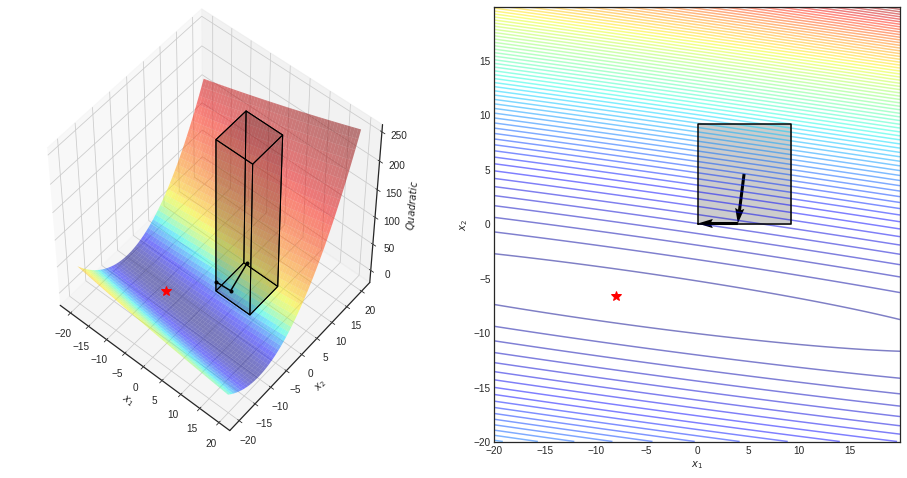

In [6]:
opt = ProjectedGradient(f=quad, ub=ub, verbose=True).minimize()
print(opt.x)
plot_trajectory_optimization(quad, opt, x_min=-20, x_max=20, y_min=-20, y_max=20)

## Frank-Wolfe or Conditional Gradient

iter	cost		lb		gap
   0	3.1885e+01	-7.9942e+00	1.2507e+00
   1	0.0000e+00	0.0000e+00	0.0000e+00

[0. 0.]


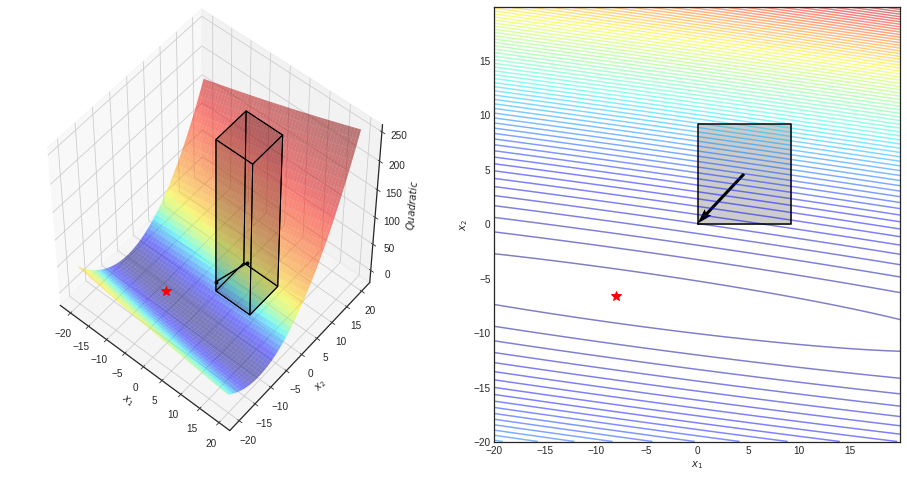

In [7]:
opt = FrankWolfe(f=quad, ub=ub, verbose=True).minimize()
print(opt.x)
plot_trajectory_optimization(quad, opt, x_min=-20, x_max=20, y_min=-20, y_max=20)

## Active Set

iter	cost		|B|	I/O
   0	3.1885e+01	0	I 1+0
   1	3.1588e+01	1	I 1+0
   2	0.0000e+00	2	

[0. 0.]


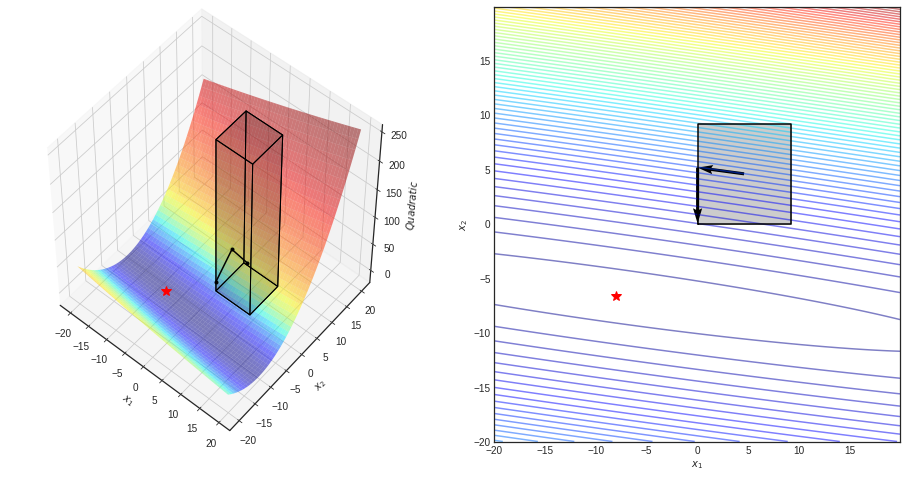

In [8]:
opt = ActiveSet(f=quad, ub=ub, verbose=True).minimize()
print(opt.x)
plot_trajectory_optimization(quad, opt, x_min=-20, x_max=20, y_min=-20, y_max=20)

## Interior Point

iter	cost		p		gap
   0	3.1885e+01	-7.9942e+00	1.2507e+00
   1	4.2147e-02	-1.3942e+01	1.3984e+01
   2	1.3540e+00	-4.5316e-01	1.3347e+00
   3	8.1598e-02	-1.7395e-01	2.5555e-01
   4	2.5577e-02	-1.2749e-02	3.8326e-02
   5	1.6148e-03	-3.5588e-03	5.1736e-03
   6	5.1861e-04	-2.6098e-04	7.7959e-04
   7	3.2801e-05	-7.2341e-05	1.0514e-04
   8	1.0540e-05	-5.3050e-06	1.5845e-05
   9	6.6666e-07	-1.4703e-06	2.1370e-06
  10	2.1422e-07	-1.0782e-07	3.2205e-07
  11	1.3550e-08	-2.9883e-08	4.3433e-08
  12	4.3540e-09	-2.1915e-09	6.5454e-09
  13	2.7539e-10	-6.0737e-10	8.8276e-10
  14	8.8493e-11	-4.4540e-11	1.3303e-10
  15	5.5972e-12	-1.2344e-11	1.7942e-11

[8.93794370e-12 6.74447639e-15]


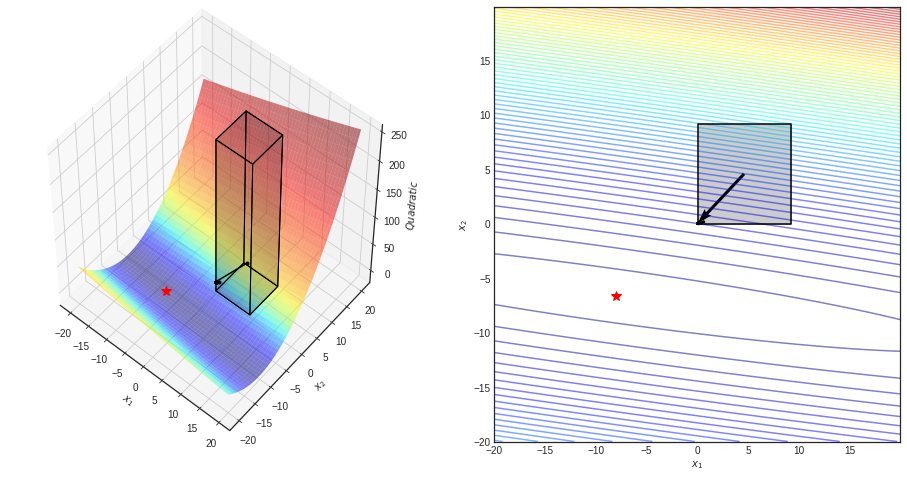

In [9]:
opt = InteriorPoint(f=quad, ub=ub, verbose=True).minimize()
print(opt.x)
plot_trajectory_optimization(quad, opt, x_min=-20, x_max=20, y_min=-20, y_max=20)

## Lagrangian Dual Relaxation

In [10]:
import numpy as np

from optiml.opti.qp import LagrangianDual
from optiml.opti.unconstrained.line_search import SteepestGradientDescent

epoch	iter	cost	
   0	   0	3.2571e+03	ub: -6.7040e+01 - pcost: 3.2571e+03 - gap: -1.0206e+00

[0. 0. 0. 0.]


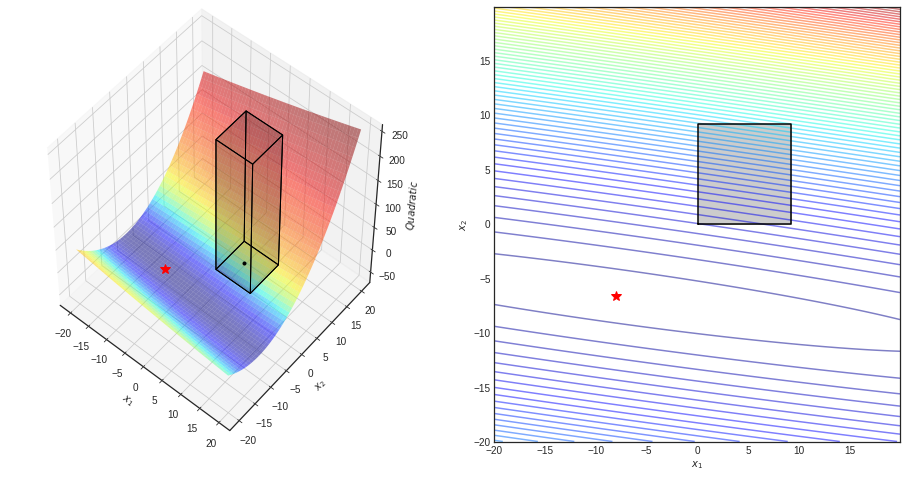

In [15]:
dual = LagrangianBoxConstrainedQuadratic(quad=quad, ub=ub)
opt = LagrangianDual(dual=dual, verbose=10).minimize()
print(opt.x)
plot_trajectory_optimization(dual.primal, opt, x_min=-20, x_max=20, y_min=-20, y_max=20)